In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("mymoviedb.csv" , lineterminator = "\n")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [30]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [31]:
df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"].dtypes)

int32


In [32]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [33]:
df["Vote_Average"].value_counts()

Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
2.2       1
9.2       1
1.5       1
3.1       1
10.0      1
Name: count, Length: 74, dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [36]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Now we will splits Genre into a list and then explode our data frame to have only genre per row from each movie 

In [37]:
df["Genre"] = df["Genre"].str.split(", ")

df = df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [38]:
# Casting Column Into Category

df["Genre"] = df["Genre"].astype("category")

df["Genre"].dtype


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25793 non-null  int32   
 1   Title              25793 non-null  object  
 2   Overview           25793 non-null  object  
 3   Popularity         25793 non-null  float64 
 4   Vote_Count         25793 non-null  int64   
 5   Vote_Average       25793 non-null  float64 
 6   Original_Language  25793 non-null  object  
 7   Genre              25793 non-null  category
 8   Poster_Url         25793 non-null  object  
dtypes: category(1), float64(2), int32(1), int64(1), object(4)
memory usage: 1.5+ MB


In [40]:
df.nunique()

Release_Date          102
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                  19
Poster_Url           9827
dtype: int64

In [41]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


# Data Visualization

In [43]:
sns.set_style("whitegrid")

# What is the most frequent genre of movies released on Netflix?

In [44]:
# showing stats. on genre column
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

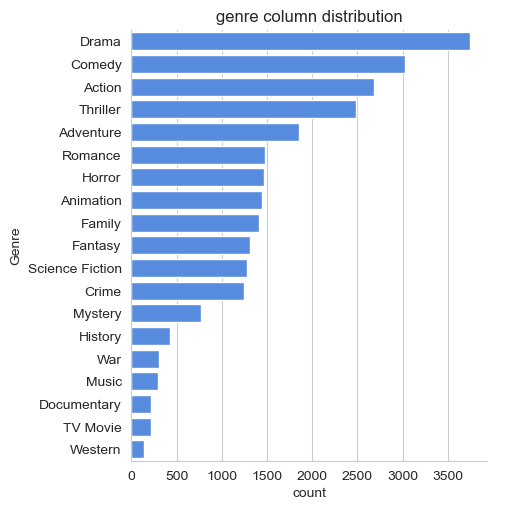

In [46]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
 color = '#4287f5')
plt.title("genre column distribution")
plt.show()

# Which has highest votes in vote avg column?

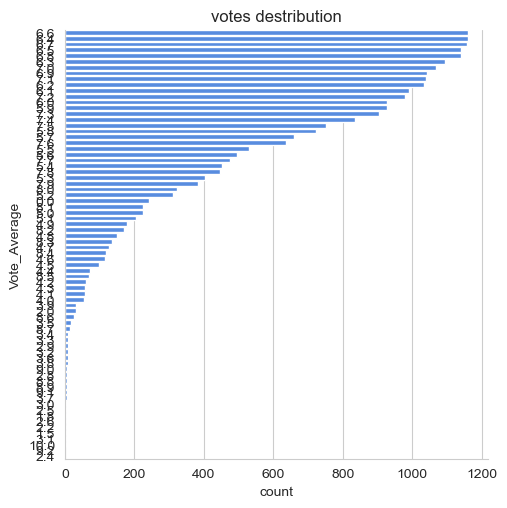

In [47]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 order = df['Vote_Average'].value_counts().index,
 color = '#4287f5')
plt.title('votes destribution')
plt.show()

# What movie got the highest popularity? what's its genre?

In [48]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


# What movie got the lowest popularity? what's its genre?

In [49]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
25787,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25788,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25789,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25790,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25791,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25792,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


# Which year has the most filmmed movies?

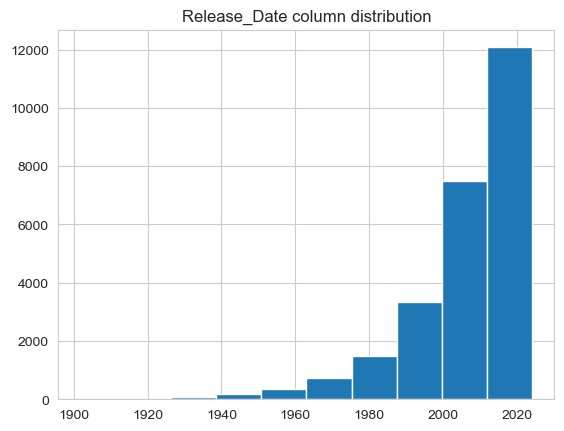

In [50]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

# Conclusion

In [ ]:
Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
    
Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
    
Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

Q3: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.

Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.